## Modeling and Simulation in Python

Project 1

Manu Patil & Richard Gao

In [47]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim library
from modsim import *
from pandas import read_csv
import numpy
import math
import pprint
from functools import reduce

### What would be the impact on the U.S. population if the flu vaccination was never introduced?

There has been a growing population that believes that the flu vaccine has no effect in preventing the disease. With massive advances in sciences over the years, there is most likely a non-negligble effect of the vaccine. 

To further dive into this question, we will attempt to model the U.S. population with and without the influenza vaccine. In order to model this hypothetical situation we will look at the following parameters:

* number of people vaccinated over time
* birth rate
* death rate
    * due to influenza
    * excluding influenza
* rate of disease spread
* total population

### Basic Model Breakdown

Time unit = months
System(population, infected, number of people vaccinated, birth rate, death rate<sans influenza>, infection rate, disease death rate<flu effectiveness>)

State( pop, infected people, vaccinated people)
Vaccinated people = read in percentage data and apply to population


Pop = pop *birthrate –pop *death rate <sans influenza>

Without Vaccine Situation
	Infected [t+1] = infected[t] + infected * infection rate
	Killed by flu = Infected* Disease Death rate

With Vaccine situation
	Vaccinated = read in data
Infected [t+1] = infected[t] + infected * infection rate
Killed by Flu = Infected * (population – vaccinated people) * Disease Death rate.










### Read data in from csv

Using the read_csv function from pandas to parse and read in influenza data from the Center for Disease Control and Prevention database.

In [48]:
def fill_list(x, y):
    interval = list(range(x, y))
    return interval

In [49]:
csv = read_csv("data/2015-2016.csv", encoding = "ISO-8859-1")

# Get the index of where each age group starts
new_group_start = []

size_of_csv = None

for size_of_csv, age_group in enumerate(csv.values[0]):
    if not isinstance(age_group, float):
        new_group_start.append(size_of_csv)  

# Isolate and retrieve just the U.S population row
us_pop_row = 54
skiprows = list(filter(lambda x : x != 2 and x != us_pop_row, range(0, us_pop_row + 1)))

# Go through each age group and get SAMPLE and puth each age groups months into a month array
rates_by_month = [[], [], [], [], [], [], [], [], [], [], []] # 2D array containing arrays of rates by different months
sample_sizes = [] # 1D array, each index corresponds to an array in rates_by_month
months = ['Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May',]

# Loop through each age group    
for index in range(0, len(new_group_start)):
    if index + 1 == len(new_group_start): # Last age group
        interval = fill_list(new_group_start[index], size_of_csv)
    else: 
        interval = fill_list(new_group_start[index], new_group_start[index + 1])

    # Get data for an age group
    df = read_csv('data/2015-2016.csv', skipinitialspace=True, skiprows=skiprows, usecols=interval, nrows=1, encoding="ISO-8859-1")

    # Put sample size for each age group into sample_sizes
    sample_sizes.append(df[df.columns[4]].iloc[0])

    # Put each month's rate into rates_by_month
    for month_num, month in enumerate(months):
        month_name = f'{month}.{index}'
        if index == 0:
            month_name = month
        if not isinstance(df[[month_name]].iloc[0][month_name], float):
            rates_by_month[month_num].append(0)
        else:
            rates_by_month[month_num].append(df[[month_name]].iloc[0][month_name])

# Compute total sample population in us
sample_total = reduce((lambda x, y: x + y), sample_sizes)

# Calculate influeza rates by month in us
us_influeza_vac_by_month = []
for month in rates_by_month:
    sum = 0
    for index, rate in enumerate(month):
        sum += sample_sizes[index] * rate
    us_influeza_vac_by_month.append(sum / sample_total)

# Print us population vaccination by month
print(us_influeza_vac_by_month)
vacc =[]
vacc.insert(0, us_influeza_vac_by_month[0])
vPast = vacc[0];
for i in range(1,10,1):
    vacc.insert(i,us_influeza_vac_by_month[i]- vPast)
    vPast = us_influeza_vac_by_month[i] 
print(vacc)

[0.564762683161331, 2.2468697044963903, 8.819293704319323, 25.841367158335924, 35.050871222529516, 38.409085579387146, 40.92616652909716, 42.433629400177175, 43.37507688686603, 43.9841261889325, 44.401958381491646]
[0.564762683161331, 1.6821070213350593, 6.572423999822933, 17.0220734540166, 9.209504064193592, 3.35821435685763, 2.5170809497100137, 1.5074628710800155, 0.9414474866888582, 0.6090493020664667]


In [50]:
birth_rate = read_csv('data/BirthRates201718.csv', skipinitialspace=True, usecols=[2])
birth_rate;
birth_rate[birth_rate.columns[0]].iloc[1];

In [51]:
death_rate = read_csv("data/DeathRates2017-18.csv", skipinitialspace=True, usecols=[2])

death_rate;

### Model

The following methods sets up the initial parameters for the simulation when called

In [52]:
def Initialize_Simulation(initPopulation, vaccinationPercent, infectionRate, vaccineEffectiveRate, infectDeathRate, diseaseRecoveryRate):
    return System(initpopulation = initPopulation,vaccinationPercent = vaccinationPercent, infection_rate = infectionRate, vaccineEffectiveRate =vaccineEffectiveRate, infectionDeathRate =infectDeathRate, diseaseRecoveryRate= diseaseRecoveryRate)
   


The next three cells are iterative tests that show the devlopment of the model. The first one simply shows the changes in population by month. The second and third one seperate out the vaccinated and infected populations

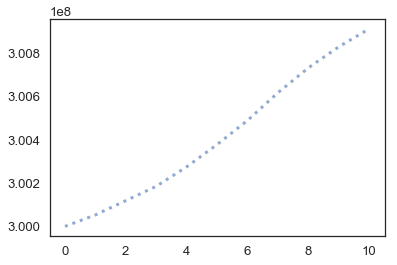

In [53]:
def Population_test():
    pops.population[0] = system.initpopulation
    months = [1,2,3,4,5,6,7,8,9,10]
    for i in months:       
        pops.population[i] = pops.population[i-1] + birth_rate[birth_rate.columns[0]].iloc[i] - death_rate[death_rate.columns[0]].iloc[i]
    plot(pops.population,':', label = 'Population')
Population_test()

#Change months to range(1,11)
#Change i to months

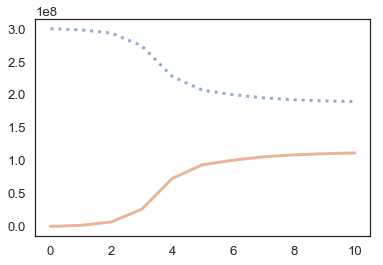

In [54]:
def Vaccine_population_Test():
    pops.population[0] = system.initpopulation
    pops.vaccinated[0] = 0
    months = [1,2,3,4,5,6,7,8,9,10]
    for i in months:
        deltavaccinated = pops.population[i-1] * system.vaccinationPercent[i-1]/100 
       
        pops.vaccinated[i] = pops.vaccinated[i-1] + deltavaccinated


        pops.population[i] = pops.population[i-1] + birth_rate[birth_rate.columns[0]].iloc[i] - death_rate[death_rate.columns[0]].iloc[i] - deltavaccinated

    plot(pops.population,':', label = 'Population');
    plot(pops.vaccinated, label ='Vaccinated');
Vaccine_population_Test()

This function considers the actual flu in its calculations. 

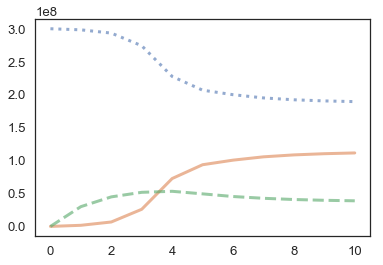

In [59]:
def Infection_population_vaccine_Test():
    pops.population[0] = system.initpopulation
    pops.vaccinated[0] = 0;
    pops.infected[0] = 0;
    months = [1,2,3,4,5,6,7,8,9,10]
    for i in months:
        deltavaccinated = pops.population[i-1] * system.vaccinationPercent[i-1]/100 
        pops.vaccinated[i] = pops.vaccinated[i-1] + deltavaccinated

        deltainfected = pops.population[i-1] * system.infection_rate - pops.infected[i-1] * system.infectionDeathRate - pops.infected[i-1] * system.diseaseRecoveryRate
        pops.infected[i] = pops.infected[i-1] + deltainfected 


        pops.population[i] = pops.population[i-1] + birth_rate[birth_rate.columns[0]].iloc[i] - death_rate[death_rate.columns[0]].iloc[i] - deltavaccinated

    plot(pops.population,':', label = 'Population');
    plot(pops.vaccinated, label ='Vaccinated');
    plot(pops.infected, "--g", label = 'Infected');
    
Infection_population_vaccine_Test();

In [121]:
def with_Perfect_Vaccine(system,vaccinated, infected, population):
    months = [1,2,3,4,5,6,7,8,9,10]
    for i in months:
        deltavaccinated =population[i-1] * system.vaccinationPercent[i-1]/100 
        vaccinated[i] = vaccinated[i-1] + deltavaccinated

        deltainfected = population[i-1] * system.infection_rate - infected[i-1] * system.infectionDeathRate - infected[i-1] * system.diseaseRecoveryRate
        infected[i] = infected[i-1] + deltainfected 


        population[i] = population[i-1] + birth_rate[birth_rate.columns[0]].iloc[i] - death_rate[death_rate.columns[0]].iloc[i] - deltavaccinated - deltainfected

    return vaccinated, infected, population


In [119]:
def with_ImPerfect_Vaccine(system,vaccinated, infected, population):
    months = [1,2,3,4,5,6,7,8,9,10]
    for i in months:
        deltavaccinated =population[i-1] * system.vaccinationPercent[i-1]/100 
        vaccinated[i] = vaccinated[i-1] + deltavaccinated

        deltainfected = population[i-1] * system.infection_rate - infected[i-1] * system.infectionDeathRate - infected[i-1] * system.diseaseRecoveryRate
        infected[i] = infected[i-1] + deltainfected 


        population[i] = population[i-1] + birth_rate[birth_rate.columns[0]].iloc[i] - death_rate[death_rate.columns[0]].iloc[i] - deltavaccinated - deltainfected

    return vaccinated, infected, population


In [123]:
def without_Vaccine(system,vaccinated, infected, population):
    months = [1,2,3,4,5,6,7,8,9,10]
    for i in months:
        #deltavaccinated =population[i-1] * system.vaccinationPercent[i-1]/100 
        #vaccinated[i] = vaccinated[i-1] + deltavaccinated
        vaccinated[i] =0;

        deltainfected = population[i-1] * system.infection_rate - infected[i-1] * system.infectionDeathRate - infected[i-1] * system.diseaseRecoveryRate
        infected[i] = infected[i-1] + deltainfected 


        population[i] = population[i-1] + birth_rate[birth_rate.columns[0]].iloc[i] - death_rate[death_rate.columns[0]].iloc[i]  - deltainfected #-deltavaccinated

    return vaccinated, infected, population


In [116]:
def run_Simulation(system, vaccine_function):
    vaccinated = TimeSeries();
    infected= TimeSeries();
    population= TimeSeries();
    population[0] = system.initpopulation
    vaccinated[0] = 0;
    infected[0] = 0;
    
    vaccinated, infected, population = vaccine_function(system,vaccinated, infected, population);
    
    
    return population, vaccinated, infected ;
    
    

In [117]:
def plot_results(population, vaccinated, infected):
    plot(population,':', label = 'Population');
    plot(vaccinated, label ='Vaccinated');
    plot(infected, "--g", label = 'Infected');
    
    

### Simulation

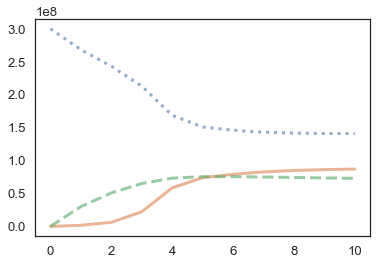

In [122]:
system = Initialize_Simulation(300000000, vacc, .1,1,1.6/100000, .2) #initPopulation, vaccinationPercent, infectionRate, vaccineEffectiveRate, infectDeathRate, diseaseRecoveryRate

population, vaccinated, infected = run_Simulation(system, with_Perfect_Vaccine)

plot_results(population, vaccinated, infected)

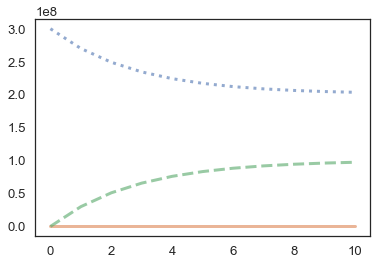

In [126]:
system = Initialize_Simulation(300000000, vacc, .1,1,1.6/100000, .2) #initPopulation, vaccinationPercent, infectionRate, vaccineEffectiveRate, infectDeathRate, diseaseRecoveryRate

population, vaccinated, infected = run_Simulation(system, without_Vaccine)

plot_results(population, vaccinated, infected)